will execute scenario elia-base-transformer-freqD-layers2-heads4-fe256


c:\Repositories\OpenUniversiteit\dne\code\venv\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
c:\Repositories\OpenUniversiteit\dne\code\venv\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Repositories\OpenUniversiteit\dne\code\venv\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


checking paths, base path is ./
training and validating the model
fourier encoding shape:torch.Size([32, 1, 30])
fourier encoding shape:torch.Size([32, 30, 1])
fourier encoding shape:torch.Size([32, 30])
fourier encoding shape:torch.Size([32, 16])
fourier encoding shape:torch.Size([32, 1, 16])
tensor([[[ 6.9350e+00+0.0000e+00j, -6.5933e-01+4.5176e-02j,
           5.2434e-01+1.1457e-02j, -7.2562e-01-1.5312e-01j,
          -3.5678e-01-2.1089e-01j,  6.3807e-02+3.8390e-01j,
           2.5593e-01-1.4747e-02j, -3.4380e-01-2.2562e-01j,
          -2.9911e-01-2.5631e-01j,  1.1140e-01+5.1988e-02j,
           1.2182e-01+5.0340e-01j,  3.0000e-01-1.3655e-01j,
          -2.1309e-02-1.4940e-01j,  2.1527e-02+4.0180e-02j,
          -1.3003e-01-1.1007e-01j, -5.1864e-01+0.0000e+00j]],

        [[ 3.2705e+00+0.0000e+00j, -2.9271e-01-1.6655e-01j,
           3.0842e-01-5.1192e-01j, -1.4750e-01-5.8441e-04j,
           8.3235e-02+1.2275e-01j, -3.8625e-02+1.5025e-01j,
           7.4470e-02+7.1162e-02j, -9.2171

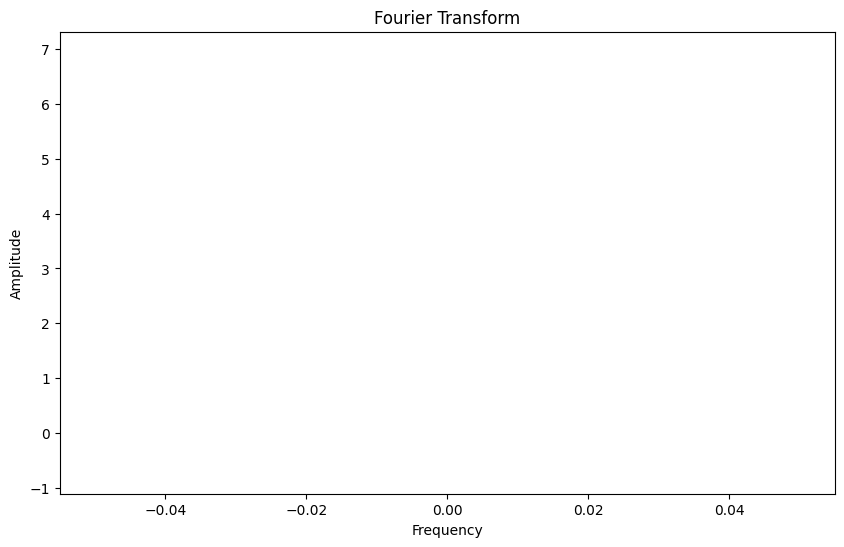

ValueError: stop

In [1]:
from building_blocks import *
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
frequencies = ["D"]
layers = [2, 4, 6]
heads = [4, 8]
forward_expansions = [256, 512]
for model_params, scenario_params in generate_scenarios("base-transformer", device, "FourierEncoder", frequencies, layers, heads, forward_expansions):
    print(f"will execute scenario {scenario_params.name}")
    model = TimeSeriesTransformer.from_params(model_params).to(device)
    scenario = Scenario(scenario_params)
    scenario.execute(model)
print(f"execution done")
